In [16]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [3]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

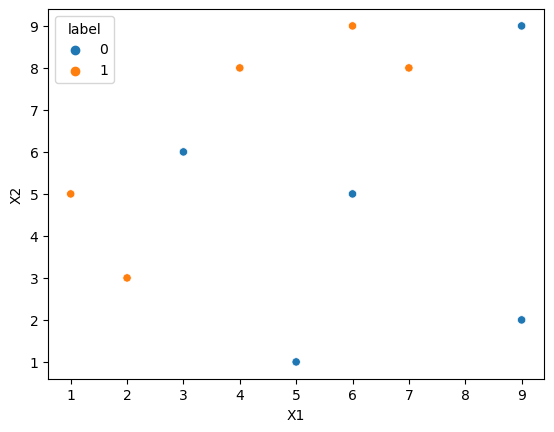

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
df['weight'] = 1/df.shape[0]

In [8]:
df.sample(3)

,X1,X2,label,weight
9,9,2,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1


In [10]:
dt = DecisionTreeClassifier(max_depth=1)

In [12]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [13]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [14]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [15]:
dt.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

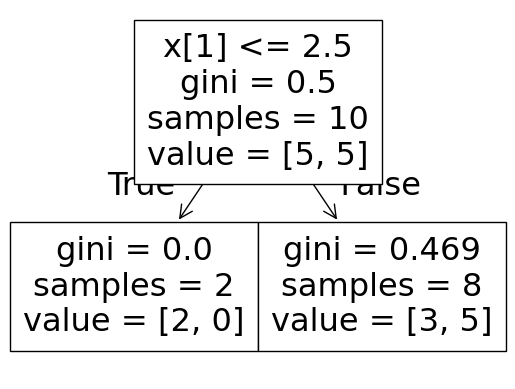

In [18]:
plot_tree(dt)

<Axes: >

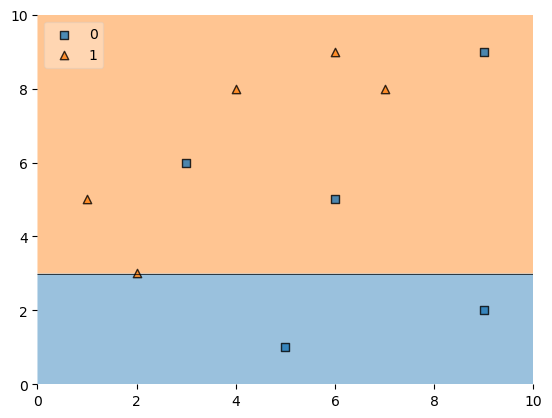

In [19]:
plot_decision_regions(x,y,clf=dt,legend=2)

In [20]:
df['y_pred'] = dt.predict(x)

In [22]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [32]:
error = np.abs(df['label'].sum() - df['y_pred'].sum())/df.shape[0]
error


0.3

In [29]:
def calculate_error_weight(error):
    return np.log((1-error)/error)/2

In [31]:
alpha = calculate_error_weight(error)
alpha

0.42364893019360184

In [38]:
def update_row_weight(row,alpha=alpha):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [39]:
df['new_wt'] = df.apply(update_row_weight,axis=1)

In [40]:
df

,X1,X2,label,weight,y_pred,new_wt
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [41]:
sum = df['new_wt'].sum()
df['norm_wt'] = df['new_wt']/sum

In [42]:
df

,X1,X2,label,weight,y_pred,new_wt,norm_wt
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429
